# Análise Exploratória dos Dados (EDA) #


In [3]:
#Importando bibliotecas para análise exploratória
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Lendo o arquivo Excel com os dados de custos de saúde
df = pd.read_excel('../data/raw/base_custos_saude.xlsx', engine='openpyxl')

# Exibindo as primeiras linhas do DataFrame
df.head()

,DtRef,Idade,Sexo,IMC,Qte_Filhos,Fumante,Regiao,Custo_Saude
0,202101,25,Masculino,26.220,0,Não,Nordeste,272.132080
1,202101,23,Masculino,17.385,1,Não,Norte,277.519215
2,202101,41,Masculino,21.780,1,Não,Sudeste,627.247720
3,202101,38,Masculino,37.050,1,Não,Nordeste,607.967150
4,202101,60,Feminino,24.530,0,Não,Sudeste,1262.989670


In [14]:
# Verificando colunas e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DtRef        1338 non-null   int64  
 1   Idade        1338 non-null   int64  
 2   Sexo         1338 non-null   object 
 3   IMC          1338 non-null   float64
 4   Qte_Filhos   1338 non-null   int64  
 5   Fumante      1338 non-null   object 
 6   Regiao       1338 non-null   object 
 7   Custo_Saude  1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [15]:
# Verificando valores duplicados 
df.duplicated().sum()

np.int64(0)

O data set é composto por 1338 observações, 8 variáveis, sendo a target: Custo_Saude, e as demais variáveis explicativas (Sexo, Fumante e Região sendo variáveis qualitativas e as demais quantitativas) com excessão de DtRef que é a variável contendo as datas. 
Não foram encontrados valores nulos ou duplicados na base 


 # Visualização dos Dados 

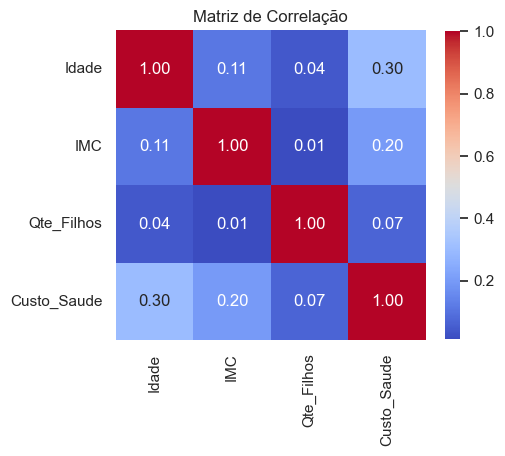

In [42]:
# Configurando o estilo do seaborn
sns.color_palette(palette='BuGn')

#Matriz de Correlação para guiar quais são as variáveis mais importantes para a análise
plt.figure(figsize=(5,5))
sns.heatmap(df.drop(['DtRef', 'Fumante', 'Sexo', 'Regiao'], axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlação")
plt.show()


Variável que mais apresentou corelação como Target foi Idade, seguida de IMC

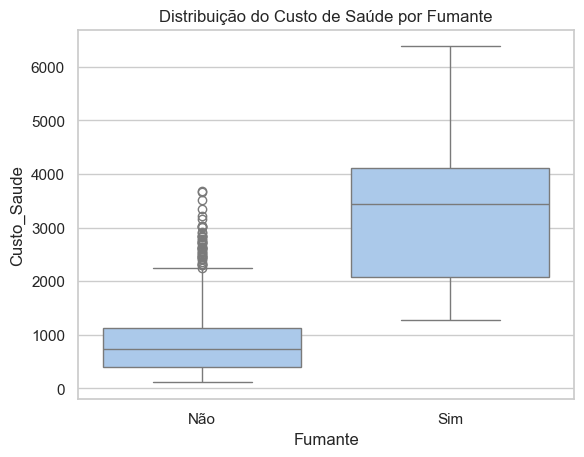

In [43]:
# Visualizando distribuição das variáveis qualitativas e target
sns.boxplot(x='Fumante', y='Custo_Saude', data=df)
plt.title("Distribuição do Custo de Saúde por Fumante")
plt.show()

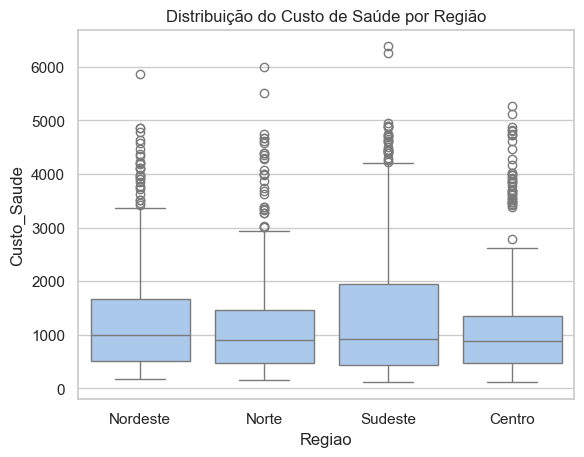

In [ ]:
# Custo de saúde por região
sns.boxplot(x='Regiao', y='Custo_Saude', data=df)
plt.title("Distribuição do Custo de Saúde por Região")
plt.show()

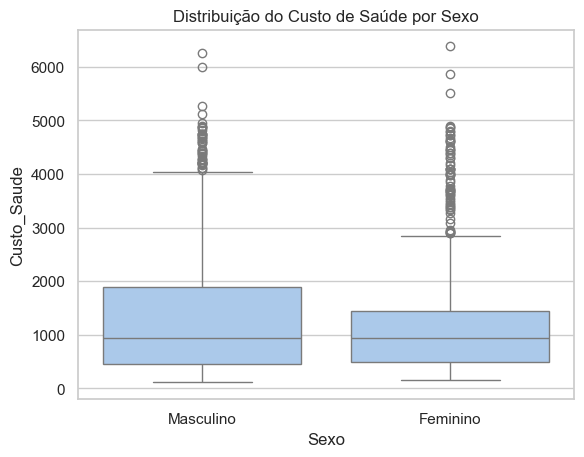

In [40]:
# Custos de saúde por sexo
sns.boxplot(x='Sexo', y='Custo_Saude', data=df)
plt.title("Distribuição do Custo de Saúde por Sexo")
plt.show()